<a href="https://colab.research.google.com/github/shivi13102/Unemployment-Analysis/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
# Load datasets
data1 = pd.read_csv('Unemployment in India.csv')
data2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

#Exploratory Data Analysis (EDA)

##Data Overview

In [5]:
# Dataset 1
print("UNEMPLOYMENT IN INDIA:")
display(data1.info())
display(data1.head())
print('\n')

# Dataset 2
print("UNEMPLOYMENT RATE IN 2020: ")
display(data2.info())
display(data2.head())

UNEMPLOYMENT IN INDIA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int64  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


None

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural




UNEMPLOYMENT RATE IN 2020: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


None

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


##Handling Missing Values

In [6]:
# Check and apply forward fill conditionally for data1
if data1.isnull().values.any():
    print("Missing values detected in data1. Applying forward fill...")
    data1.ffill(inplace=True)
else:
    print("No missing values in data1. Forward fill not applied.")

# Check and apply forward fill conditionally for data2
if data2.isnull().values.any():
    print("Missing values detected in data2. Applying forward fill...")
    data2.ffill(inplace=True)
else:
    print("No missing values in data2. Forward fill not applied.")

# Verify the results
print("Missing values in data1 after operation:\n", data1.isnull().sum())
print("Missing values in data2 after operation:\n", data2.isnull().sum())


No missing values in data1. Forward fill not applied.
No missing values in data2. Forward fill not applied.
Missing values in data1 after operation:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64
Missing values in data2 after operation:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


##Data Cleaning

###1. Consistency in column names

In [7]:
# Rename the first column of data1 to "State"
data1.rename(columns={data1.columns[0]: "State"}, inplace=True)

# Rename the first column of data2 to "State"
data2.rename(columns={data2.columns[0]: "State"}, inplace=True)
data2.rename(columns={data2.columns[6]: "Region"}, inplace=True)

In [8]:
data1.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
data2.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [9]:
# Verify the changes
print("Columns in data1 after renaming:\n", data1.columns)
print("Columns in data2 after renaming:\n", data2.columns)

Columns in data1 after renaming:
 Index(['state', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')
Columns in data2 after renaming:
 Index(['state', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'region', 'longitude', 'latitude'],
      dtype='object')


###2. Convert date to DateTime

In [10]:
data1['date'] = pd.to_datetime(data1['date'], dayfirst=True)
data2['date'] = pd.to_datetime(data2['date'], dayfirst=True)

###3. Check for Duplicates

In [11]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())

0
0


###4. Count of records for each state

In [38]:
# Count the number of rows for each state in data1
state_counts_data1 = data1.groupby('state').size()

# Count the number of rows for each state in data2
state_counts_data2 = data2.groupby('state').size()

# Display the counts for both datasets
print("State-wise row counts for data1:")
display(state_counts_data1)

print("\nState-wise row counts for data2:")
display(state_counts_data2)


State-wise row counts for data1:


,0
state,
Andhra Pradesh,28
Assam,26
Bihar,28
Chandigarh,12
Chhattisgarh,28
Delhi,28
Goa,24
Gujarat,28
Haryana,28



State-wise row counts for data2:


,0
state,
Andhra Pradesh,10
Assam,10
Bihar,10
Chhattisgarh,10
Delhi,10
Goa,10
Gujarat,10
Haryana,10
Himachal Pradesh,10


### 5. Combining the two tables and then cleaning it

In [50]:
# Step 1: Combine data1 and data2
combined_data = pd.concat([data1, data2], ignore_index=True)

# Step 2: Remove duplicates based on the specified columns
combined_data_cleaned = combined_data.drop_duplicates(subset=['state', 'date', 'frequency',
                                                              'estimated_unemployment_rate_(%)',
                                                              'estimated_employed',
                                                              'estimated_labour_participation_rate_(%)'])

# Display the cleaned data and the number of rows per state
print("Cleaned Data:")
display(combined_data_cleaned.head(50))

Cleaned Data:


,state,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,NaN,NaN,NaN
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412,43.01,Rural,NaN,NaN,NaN
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681,41.00,Rural,NaN,NaN,NaN
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395,45.14,Rural,NaN,NaN,NaN
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676,43.46,Rural,NaN,NaN,NaN
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617,42.83,Rural,NaN,NaN,NaN


In [51]:
# Step 3: Group by state
grouped_data = combined_data_cleaned.groupby('state').size()

print("\nState-wise row counts for the cleaned data:")
print(grouped_data)


State-wise row counts for the cleaned data:
state
Andhra Pradesh      38
Assam               36
Bihar               38
Chandigarh          12
Chhattisgarh        38
Delhi               38
Goa                 34
Gujarat             38
Haryana             38
Himachal Pradesh    38
Jammu & Kashmir     30
Jharkhand           38
Karnataka           38
Kerala              38
Madhya Pradesh      38
Maharashtra         38
Meghalaya           37
Odisha              38
Puducherry          36
Punjab              38
Rajasthan           38
Sikkim              25
Tamil Nadu          38
Telangana           38
Tripura             38
Uttar Pradesh       38
Uttarakhand         37
West Bengal         38
dtype: int64


In [59]:
# Sort the data first by 'state' in alphabetical order, and then by 'date' in ascending order
sorted_data = combined_data.sort_values(by=['state', 'date'])

# Display the sorted data
print("Sorted Data by State and Date:")
display(sorted_data.head(30))


Sorted Data by State and Date:


,state,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,NaN,NaN,NaN
359,Andhra Pradesh,2019-05-31,Monthly,6.09,4788661,37.45,Urban,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,NaN,NaN,NaN
360,Andhra Pradesh,2019-06-30,Monthly,3.80,4824630,36.76,Urban,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,NaN,NaN,NaN
361,Andhra Pradesh,2019-07-31,Monthly,5.64,4657443,36.10,Urban,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,NaN,NaN,NaN
362,Andhra Pradesh,2019-08-31,Monthly,4.61,4743179,36.29,Urban,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,NaN,NaN,NaN
363,Andhra Pradesh,2019-09-30,Monthly,6.01,4733996,36.69,Urban,NaN,NaN,NaN


In [64]:
# Check unique values in the 'frequency' column
print("Unique values in the 'frequency' column:")
print(sorted_data['frequency'].unique())

# Strip any leading/trailing spaces and replace 'M' with 'Monthly'
sorted_data['frequency'] = sorted_data['frequency'].str.strip().replace('M', 'Monthly')

# Display the updated data
print("Updated Data with Frequency Replaced:")
display(sorted_data.head(40))


Unique values in the 'frequency' column:
[' Monthly' 'Monthly' ' M']
Updated Data with Frequency Replaced:


,state,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,NaN,NaN,NaN
359,Andhra Pradesh,2019-05-31,Monthly,6.09,4788661,37.45,Urban,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,NaN,NaN,NaN
360,Andhra Pradesh,2019-06-30,Monthly,3.80,4824630,36.76,Urban,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,NaN,NaN,NaN
361,Andhra Pradesh,2019-07-31,Monthly,5.64,4657443,36.10,Urban,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,NaN,NaN,NaN
362,Andhra Pradesh,2019-08-31,Monthly,4.61,4743179,36.29,Urban,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,NaN,NaN,NaN
363,Andhra Pradesh,2019-09-30,Monthly,6.01,4733996,36.69,Urban,NaN,NaN,NaN


In [66]:
# Reset the index and drop the old index
sorted_data.reset_index(drop=True, inplace=True)

# Update the index to start from 1
sorted_data.index = sorted_data.index + 1

# Display the updated data with the proper index
print("Updated Data with Proper Index:")
display(sorted_data.head(40))


Updated Data with Proper Index:


,state,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region,longitude,latitude
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-05-31,Monthly,6.09,4788661,37.45,Urban,NaN,NaN,NaN
3,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-06-30,Monthly,3.80,4824630,36.76,Urban,NaN,NaN,NaN
5,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,NaN,NaN,NaN
6,Andhra Pradesh,2019-07-31,Monthly,5.64,4657443,36.10,Urban,NaN,NaN,NaN
7,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,NaN,NaN,NaN
8,Andhra Pradesh,2019-08-31,Monthly,4.61,4743179,36.29,Urban,NaN,NaN,NaN
9,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,NaN,NaN,NaN
10,Andhra Pradesh,2019-09-30,Monthly,6.01,4733996,36.69,Urban,NaN,NaN,NaN


In [67]:
data=sorted_data

##Comparison Data Tables of 2019 and 2020

In [68]:
# Extract unique years from the 'date' column
unique_years = data['date'].dt.year.unique()

# Check for years other than 2019 and 2020
other_years = [year for year in unique_years if year not in [2019, 2020]]

if other_years:
    print(f"Years other than 2019 and 2020 found: {other_years}")
    data_other_years = data[data['date'].dt.year.isin(other_years)]
    print("Data from other years:")
    print(data_other_years)
else:
    print("No data for years other than 2019 and 2020.")


No data for years other than 2019 and 2020.


In [71]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data1['date'])

# Extract rows for the year 2019
data_2019 = data[data['date'].dt.year == 2019]

# Extract rows for the year 2020
data_2020 = data[data['date'].dt.year == 2020]

# Display the first few rows of each table
print("Data for 2019:")
display(data_2019)

print("\nData for 2020:")
display(data_2020)


Data for 2019:


,state,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region,longitude,latitude
1,Andhra Pradesh,2019-06-30,Monthly,3.65,11999139,43.24,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,6.09,4788661,37.45,Urban,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.05,11755881,42.05,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,3.80,4824630,36.76,Urban,NaN,NaN,NaN
5,Andhra Pradesh,2019-10-31,Monthly,3.75,12086707,43.50,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
729,Rajasthan,2019-08-31,Monthly,13.02,5384335,40.80,Urban,NaN,NaN,NaN
730,Rajasthan,2019-09-30,Monthly,10.47,15278556,40.87,Rural,NaN,NaN,NaN
731,Rajasthan,2019-10-31,Monthly,14.30,5306715,40.73,Urban,NaN,NaN,NaN
732,Rajasthan,2019-11-30,Monthly,13.96,15485307,43.00,Rural,NaN,NaN,NaN



Data for 2020:


,state,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region,longitude,latitude
8,Andhra Pradesh,2020-01-31,Monthly,4.61,4743179,36.29,Urban,NaN,NaN,NaN
9,Andhra Pradesh,2020-02-29,Monthly,5.17,12256762,44.68,Rural,NaN,NaN,NaN
10,Andhra Pradesh,2020-03-31,Monthly,6.01,4733996,36.69,Urban,NaN,NaN,NaN
11,Andhra Pradesh,2020-04-30,Monthly,3.52,12017412,43.01,Rural,NaN,NaN,NaN
12,Andhra Pradesh,2020-05-31,Monthly,4.70,4774377,36.41,Urban,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
735,Rajasthan,2020-02-29,Monthly,18.82,5157363,41.59,Urban,NaN,NaN,NaN
736,Rajasthan,2020-03-31,Monthly,10.97,20641716,40.51,NaN,North,27.0238,74.2179
737,Rajasthan,2020-04-30,Monthly,14.48,15040572,41.83,Rural,NaN,NaN,NaN
738,Rajasthan,2020-05-31,Monthly,17.02,5288343,41.62,Urban,NaN,NaN,NaN


#Data Visualization

###1. Unemployment Rate Over Time

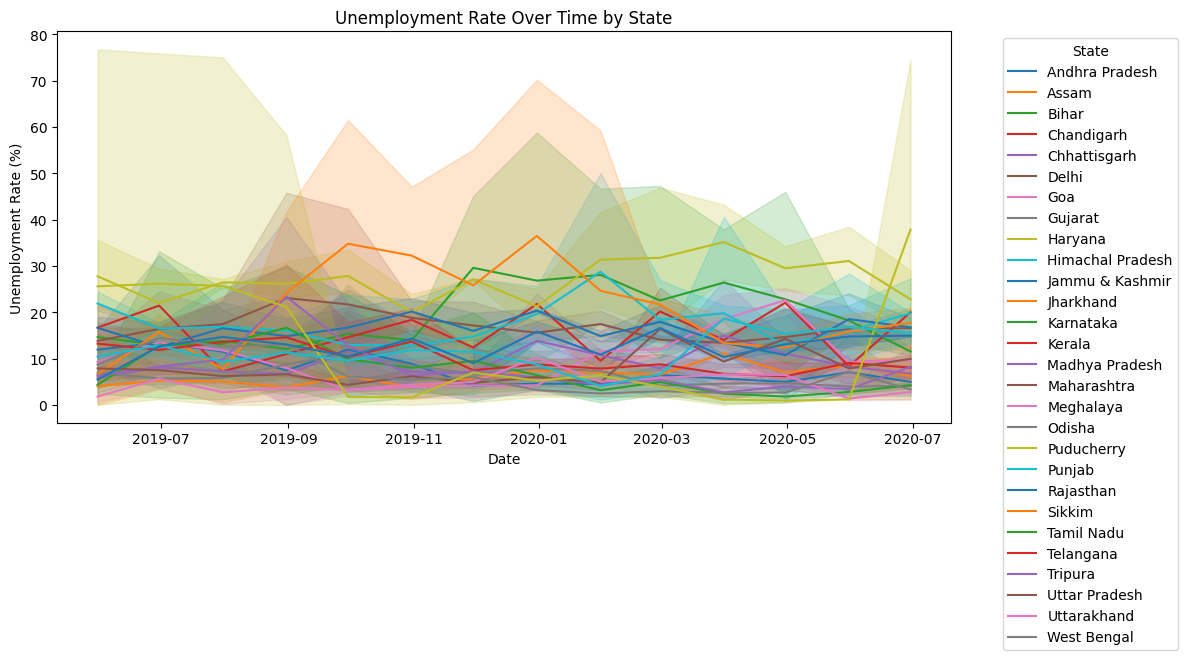

In [72]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='estimated_unemployment_rate_(%)', hue='state', palette='tab10')

# Add legend on the right side
plt.legend(
    title='State',
    bbox_to_anchor=(1.05, 1),  # Position legend outside the plot
    loc='upper left'
)

# Add titles and labels
plt.title('Unemployment Rate Over Time by State')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

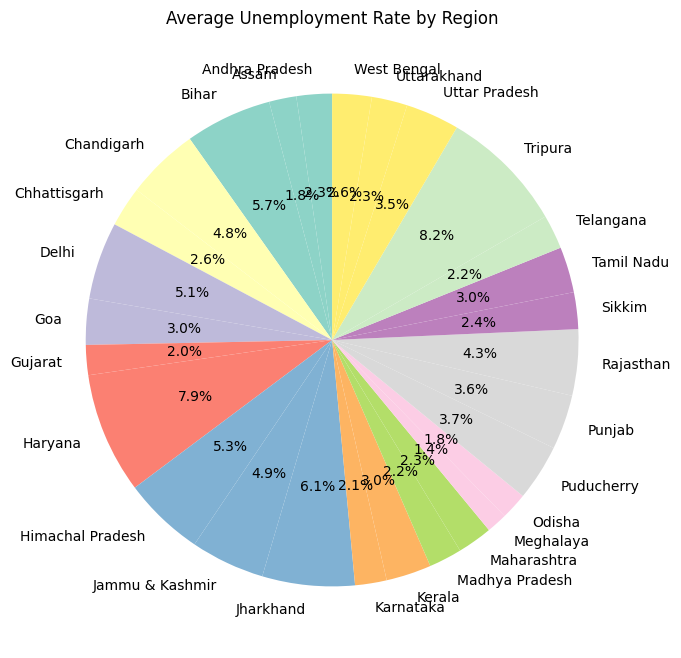

In [73]:
# Assuming data2 is already preprocessed and the 'region' column is categorical
region_unemployment_rate = data.groupby('state')['estimated_unemployment_rate_(%)'].mean()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
region_unemployment_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Title and formatting
plt.title('Average Unemployment Rate by Region')
plt.ylabel('')  # Hide the ylabel
plt.show()

###2. Regional Analysis

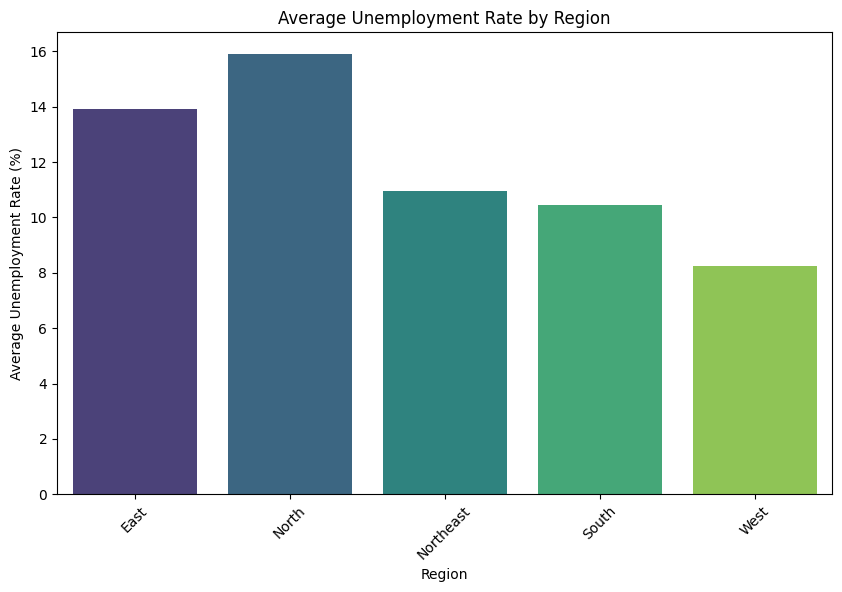

In [74]:
# Group by region and calculate the average unemployment rate
region_group = data.groupby('region')['estimated_unemployment_rate_(%)'].mean().reset_index()

# Create a bar plot with 'hue' assigned to 'region' and turning off the legend
plt.figure(figsize=(10, 6))
sns.barplot(data=region_group, x='region', y='estimated_unemployment_rate_(%)', hue='region', palette='viridis', legend=False)

# Title and show the plot
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

###3. Area-wise Analysis

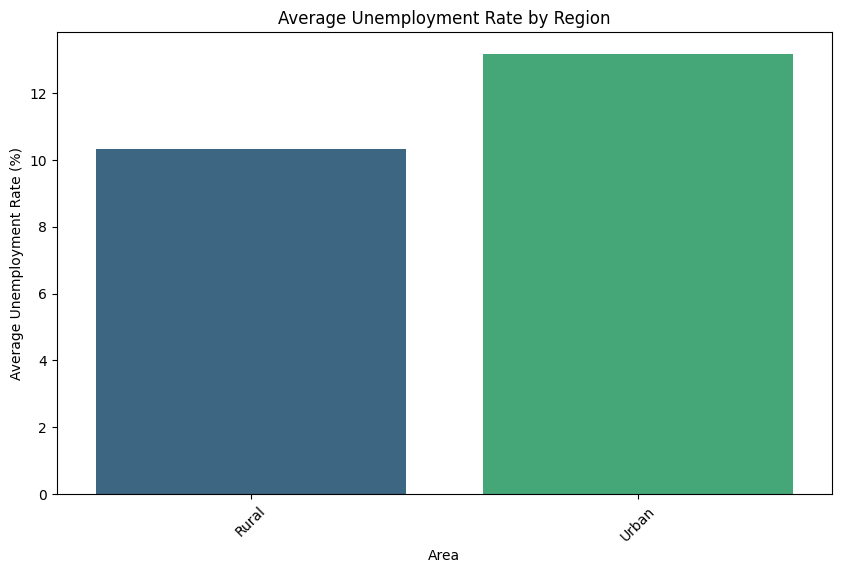

In [75]:
# Group by region and calculate the average unemployment rate
region_group = data.groupby('area')['estimated_unemployment_rate_(%)'].mean().reset_index()

# Create a bar plot with 'hue' assigned to 'region' and turning off the legend
plt.figure(figsize=(10, 6))
sns.barplot(data=region_group, x='area', y='estimated_unemployment_rate_(%)', hue='area', palette='viridis', legend=False)

# Title and show the plot
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

###4. Heatmap of Unemployment by State

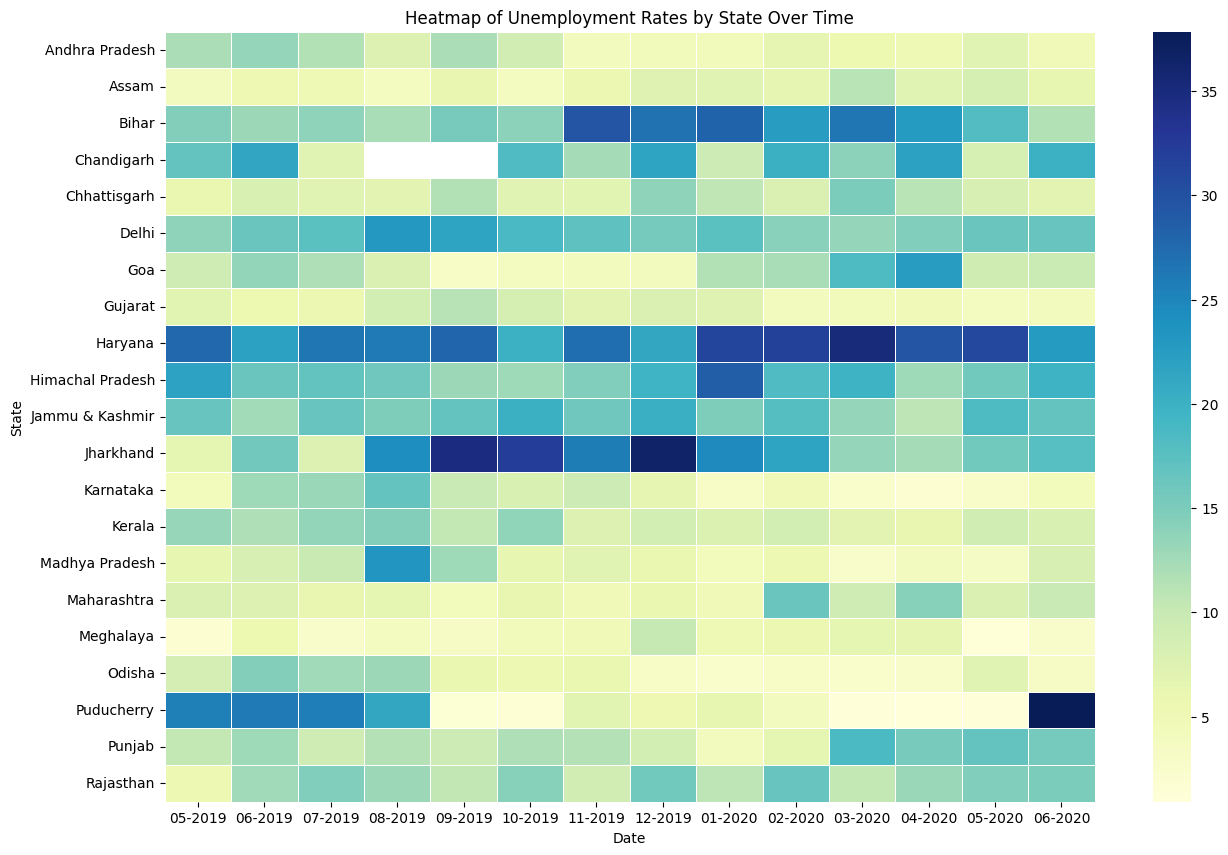

In [76]:
# Create pivot table
pivot_data = data.pivot_table(index='state', columns='date', values='estimated_unemployment_rate_(%)')

# Format the dates in the pivot table columns to "DD-MM-YYYY"
pivot_data.columns = [col.strftime('%m-%Y') for col in pivot_data.columns]

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5)

# Add title and show plot
plt.title('Heatmap of Unemployment Rates by State Over Time')
plt.xlabel('Date')
plt.ylabel('State')
plt.show()

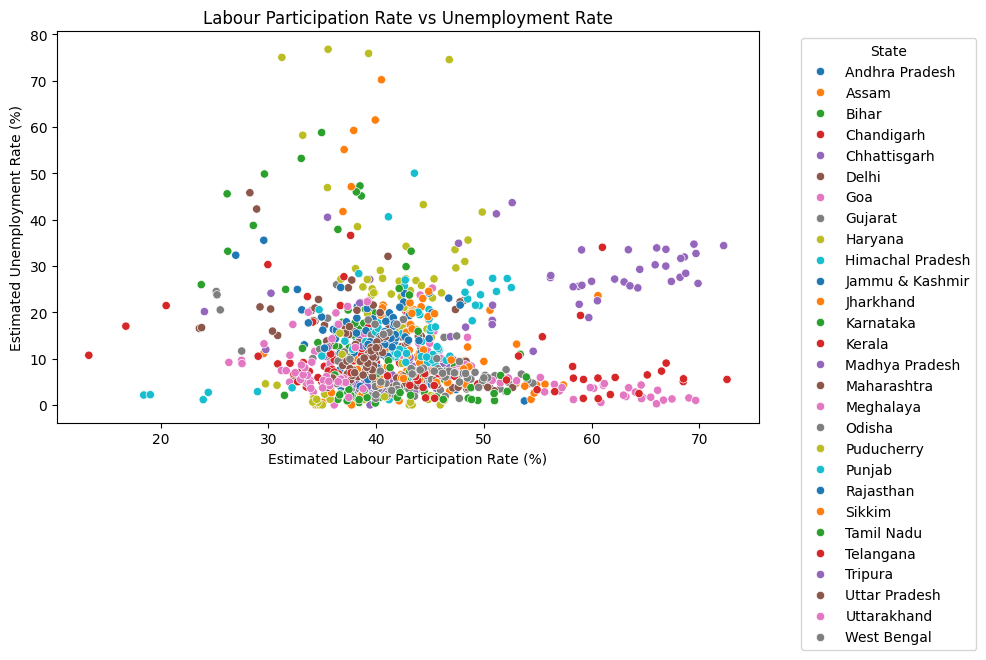

In [77]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='estimated_labour_participation_rate_(%)',
    y='estimated_unemployment_rate_(%)',
    hue='state',
    palette='tab10'
)

# Add legend on the right side
plt.legend(
    title='State',
    bbox_to_anchor=(1.05, 1),  # Position legend outside the plot
    loc='upper left'
)

# Add titles and labels
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')

# Adjust layout to avoid clipping
plt.tight_layout()
plt.show()